<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

### Package Version:
- tensorflow==2.2.0
- pandas==1.0.5
- numpy==1.18.5
- google==2.0.3

# Sarcasm Detection

### Dataset

#### Acknowledgement
Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Load Data (3 Marks)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

os.chdir("/content/drive/My Drive/ClassNotes/Lab9-Seq models in NLP/SarcasmDetection")
os.getcwd()


'/content/drive/My Drive/ClassNotes/Lab9-Seq models in NLP/SarcasmDetection'

In [3]:
def parseJson(fname):
    for line in open(fname, 'r'):
        yield eval(line)

In [4]:
data = list(parseJson('./Data/Sarcasm_Headlines_Dataset.json'))

In [5]:
data[4]

{'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb',
 'headline': 'j.k. rowling wishes snape happy birthday in the most magical way',
 'is_sarcastic': 0}

In [6]:
dfObj = pd.DataFrame(data) 
dfObj.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [7]:
dfObj.shape

(26709, 3)

### Drop `article_link` from dataset (3 Marks)

In [8]:
dfObj.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [9]:
dfObj=dfObj.drop(['article_link'], axis=1)
dfObj.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


### Get length of each headline and add a column for that (3 Marks)

In [10]:
dfObj['length']=dfObj.apply(lambda row: len(row["headline"]), axis = 1) 

In [11]:
dfObj.head()

,headline,is_sarcastic,length
0,former versace store clerk sues over secret 'b...,0,78
1,the 'roseanne' revival catches up to our thorn...,0,84
2,mom starting to fear son's web series closest ...,1,79
3,"boehner just wants wife to listen, not come up...",1,84
4,j.k. rowling wishes snape happy birthday in th...,0,64


In [12]:
dfObj["length"].max()

254

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [13]:
max_features = 10000
maxlen = 25
embedding_size = 200

Splitting the Data into test and train

In [14]:
# Splitting the dataset into Train and Test
training_size = round(len(dfObj['headline']) * .75)

training_sentences = dfObj['headline'][0:training_size]
testing_sentences = dfObj['headline'][training_size:]

training_labels = dfObj["is_sarcastic"][0:training_size]
testing_labels = dfObj["is_sarcastic"][training_size:]


### Apply `tensorflow.keras` Tokenizer and get indices for words (3 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokeniser = Tokenizer(num_words=10000)

In [16]:
# Fit the tokenizer on Training data
tokeniser.fit_on_texts(training_sentences)

In [17]:
training_sequences = tokeniser.texts_to_sequences(training_sentences)

testing_sequences = tokeniser.texts_to_sequences(testing_sentences)




### Pad sequences (3 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [20]:
# Creating padded sequences from train and test data
from tensorflow.keras.preprocessing.sequence import pad_sequences

trunc_type='post'
padding_type='post'
training_padded = pad_sequences(training_sequences, maxlen=maxlen,
                                padding=padding_type, truncating=trunc_type)
testing_padded = pad_sequences(testing_sequences, maxlen=maxlen, 
                               padding=padding_type, truncating=trunc_type)

In [21]:
# Converting the lists to numpy arrays for Tensorflow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [22]:
is_sarcastic_array =  dfObj[["is_sarcastic"]].values
is_sarcastic_array[0:5]

array([[0],
       [0],
       [1],
       [1],
       [0]])

### Vocab mapping
- There is no word for 0th index

In [23]:
tokeniser.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'by': 18,
 'this': 19,
 'after': 20,
 'be': 21,
 'up': 22,
 'out': 23,
 'that': 24,
 'how': 25,
 'as': 26,
 'it': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'what': 31,
 'his': 32,
 'all': 33,
 'he': 34,
 'who': 35,
 'will': 36,
 'just': 37,
 'has': 38,
 'more': 39,
 'one': 40,
 'year': 41,
 'into': 42,
 'report': 43,
 'have': 44,
 'why': 45,
 'over': 46,
 'area': 47,
 'u': 48,
 'donald': 49,
 'says': 50,
 'day': 51,
 'can': 52,
 's': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'old': 58,
 'get': 59,
 'her': 60,
 'no': 61,
 "trump's": 62,
 'off': 63,
 'now': 64,
 'an': 65,
 'life': 66,
 'people': 67,
 'obama': 68,
 'women': 69,
 'house': 70,
 "'": 71,
 'white': 72,
 'was': 73,
 'still': 74,
 'back': 75,
 'make': 76,
 'than': 77,
 'down': 78,
 'clinton': 79,
 'when': 80,
 'my': 81,


### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [24]:
num_words = len(tokeniser.word_index) + 1
print(num_words)

25652


### Load Glove Word Embeddings (3 Marks)

In [25]:
from keras.layers.embeddings import Embedding
embeddings_dictionary = dict()
glove_file = open('./Data/glove.6B.200d.txt', encoding="utf8")


### Create embedding matrix

In [26]:
EMBEDDING_FILE = './Data/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokeniser.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

### Define model (5 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [27]:
from keras.models import Sequential
from keras.layers import Flatten, LSTM, Bidirectional, Dense
from keras.layers.core import Dropout

model = Sequential()
model.add(Embedding(max_features, 200, input_length = maxlen, trainable=False))
model.add(Bidirectional(LSTM(50, batch_input_shape=(25, 1),return_sequences=True)))
model.add(Flatten())
#model.add(Dense(100, activation='relu'))
# Dropout for regularization
model.add(Dropout(0.30))
model.add(Dense(10, activation='relu'))
# Output layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 200)           2000000   
_________________________________________________________________
bidirectional (Bidirectional (None, 25, 100)           100400    
_________________________________________________________________
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                25010     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 2,125,421
Trainable params: 125,421
Non-trainable params: 2,000,000
________________________________________

### Compile the model (3 Marks)

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

### Fit the model (4 Marks)

In [29]:

history = model.fit(training_padded, training_labels, 
                    validation_data=(testing_padded, testing_labels), 
                    batch_size=128, epochs=50, verbose=1)


Epoch 1/50
157/157 [==============================] - 3s 16ms/step - loss: 0.6131 - acc: 0.6389 - val_loss: 0.5509 - val_acc: 0.7093
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5445 - acc: 0.7086 - val_loss: 0.5390 - val_acc: 0.7160
Epoch 3/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5256 - acc: 0.7256 - val_loss: 0.5224 - val_acc: 0.7294
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5108 - acc: 0.7355 - val_loss: 0.5107 - val_acc: 0.7418
Epoch 5/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4937 - acc: 0.7510 - val_loss: 0.5001 - val_acc: 0.7454
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4861 - acc: 0.7542 - val_loss: 0.4939 - val_acc: 0.7454
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4714 - acc: 0.7637 - val_loss: 0.4897 - val_acc: 0.7533
Epoch 8/50
157/157 [==============================] - 2s 11ms/step - 

In [30]:
score,acc = model.evaluate(training_padded, training_labels, verbose = 0, batch_size = 128)
print("TRAIN : score: %.2f" % (score))
print("acc: %.2f" % (acc))

score12,acc12 = model.evaluate(testing_padded, testing_labels, verbose = 0, batch_size = 128)
print("TEST : score: %.2f" % (score12))
print("acc: %.2f" % (acc12))

TRAIN : score: 0.10
acc: 0.96
TEST : score: 0.78
acc: 0.81


**Trying other models with variations, anyways!!**

In [31]:
## Model2 :  without Bidirectional layer

model2 = Sequential()
model2.add(Embedding(max_features, 200,input_length = maxlen, trainable=False))
model2.add(LSTM(100, batch_input_shape=(25, 1),return_sequences=True))
model2.add(Flatten())
model2.add(Dropout(0.15))
model2.add(Dense(80, activation='relu'))
# Output layer
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
history2 = model2.fit(training_padded, training_labels, 
                    validation_data=(testing_padded, testing_labels), 
                    batch_size=128, epochs=50, verbose=1)



Epoch 1/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5711 - acc: 0.6823 - val_loss: 0.5393 - val_acc: 0.7124
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5194 - acc: 0.7298 - val_loss: 0.5136 - val_acc: 0.7331
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4990 - acc: 0.7470 - val_loss: 0.5098 - val_acc: 0.7375
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4889 - acc: 0.7518 - val_loss: 0.5110 - val_acc: 0.7342
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4751 - acc: 0.7600 - val_loss: 0.4989 - val_acc: 0.7424
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4613 - acc: 0.7688 - val_loss: 0.4870 - val_acc: 0.7470
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4513 - acc: 0.7743 - val_loss: 0.4867 - val_acc: 0.7463
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 0

In [32]:
## Model3:  with Bidirectional layer but lesser dropout

model3 = Sequential()
model3.add(Embedding(max_features, 200, input_length = maxlen, trainable=False))
model3.add(Bidirectional(LSTM(10, batch_input_shape=(25, 1),return_sequences=True)))
model3.add(Flatten())
model3.add(Dropout(0.10))
model3.add(Dense(10, activation='relu'))
# Output layer
model3.add(Dense(1,activation='sigmoid'))
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history3 = model3.fit(training_padded, training_labels, 
                    validation_data=(testing_padded, testing_labels), 
                    batch_size=128, epochs=50, verbose=1)


Epoch 1/50
157/157 [==============================] - 3s 16ms/step - loss: 0.6254 - acc: 0.6299 - val_loss: 0.5529 - val_acc: 0.7056
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5417 - acc: 0.7093 - val_loss: 0.5309 - val_acc: 0.7258
Epoch 3/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5238 - acc: 0.7263 - val_loss: 0.5202 - val_acc: 0.7324
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5139 - acc: 0.7321 - val_loss: 0.5105 - val_acc: 0.7327
Epoch 5/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5022 - acc: 0.7441 - val_loss: 0.5038 - val_acc: 0.7345
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4923 - acc: 0.7497 - val_loss: 0.5094 - val_acc: 0.7372
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4846 - acc: 0.7527 - val_loss: 0.4983 - val_acc: 0.7399
Epoch 8/50
157/157 [==============================] - 2s 11ms/step - 

In [33]:
## Model4:  with Bidirectional layer 

model4 = Sequential()
model4.add(Embedding(max_features, 200, input_length = maxlen, trainable=False))
model4.add(Bidirectional(LSTM(10, batch_input_shape=(25, 1),return_sequences=True)))
model4.add(Flatten())
model4.add(Dropout(0.05))
model4.add(Dense(100, activation='relu'))
# Output layer
model4.add(Dense(1,activation='sigmoid'))
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

history4 = model4.fit(training_padded, training_labels, 
                    validation_data=(testing_padded, testing_labels), 
                    batch_size=128, epochs=50, verbose=1)


Epoch 1/50
157/157 [==============================] - 3s 16ms/step - loss: 0.6201 - acc: 0.6371 - val_loss: 0.5527 - val_acc: 0.7074
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5317 - acc: 0.7214 - val_loss: 0.5228 - val_acc: 0.7306
Epoch 3/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5106 - acc: 0.7385 - val_loss: 0.5194 - val_acc: 0.7270
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4958 - acc: 0.7491 - val_loss: 0.5022 - val_acc: 0.7446
Epoch 5/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4863 - acc: 0.7559 - val_loss: 0.4953 - val_acc: 0.7470
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4763 - acc: 0.7629 - val_loss: 0.4951 - val_acc: 0.7491
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4672 - acc: 0.7685 - val_loss: 0.4879 - val_acc: 0.7529
Epoch 8/50
157/157 [==============================] - 2s 11ms/step - 

## Comparing model's performance 

In [37]:
print("Model1 \n Train score: " ,score," acc:" , acc)
print("Test : score: " ,score12," acc:" , acc12)


score21,acc21 = model2.evaluate(training_padded, training_labels, verbose = 0, batch_size = 128)
score22,acc22 = model2.evaluate(testing_padded, testing_labels, verbose = 0, batch_size = 128)
print("\n Model2 \nTrain : score2: " ,score21," acc2:" , acc21)
print("Test :score2: " ,score22," acc2:" , acc22)


score31,acc31 = model3.evaluate(training_padded, training_labels, verbose = 0, batch_size = 128)
score32,acc32 = model3.evaluate(testing_padded, testing_labels, verbose = 0, batch_size = 128)
print("\n Model3 \nTrain :score3: ", score31," acc3:",  acc31)
print("Test :score3: ", score32," acc32:",  acc32)

score41,acc41 = model4.evaluate(training_padded, training_labels, verbose = 0, batch_size = 128)
score42,acc42 = model4.evaluate(testing_padded, testing_labels, verbose = 0, batch_size = 128)
print("\n Model4 \nTrain :score: ", score41," acc:",  acc41)
print("Test :score: ", score42," acc:",  acc42)


Model1 
 Train score:  0.09559154510498047  acc: 0.9642072916030884
Test : score:  0.7785038948059082  acc: 0.8112924695014954

 Model2 
Train : score2:  0.022687699645757675  acc2: 0.9933606386184692
Test :score2:  1.3443611860275269  acc2: 0.7870301008224487

 Model3 
Train :score3:  0.24310870468616486  acc3: 0.8982128500938416
Test :score3:  0.45864206552505493  acc32: 0.8096450567245483

 Model4 
Train :score:  0.1672070473432541  acc: 0.9330571293830872
Test :score:  0.49915528297424316  acc: 0.8118915557861328


## Clearly model 4 is best fit here, hence using it to plot accuracy and loss below

**Plot the Result**

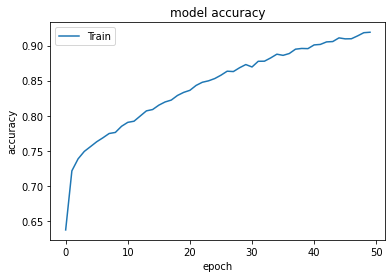

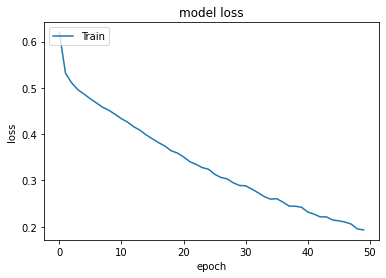

<Figure size 432x288 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history4.history['acc'])
#plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
plt.savefig('model_accuracy.png')
# summarize history for loss
plt.plot(history4.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()
plt.savefig('model_loss.png')

In [40]:
#Save the model
model_json = model4.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model4.save_weights("/modelSarcasticOrNot.h5")